In [427]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [351]:
#puntos generados random
a = np.random.randint(1,10000,10000)
#linea para la funcion
c = np.linspace(1,100,10000)
#elevamos al cuadrado los elementos
c = cuadrado(c)

In [352]:
len(a)

10000

<Figure size 432x288 with 0 Axes>

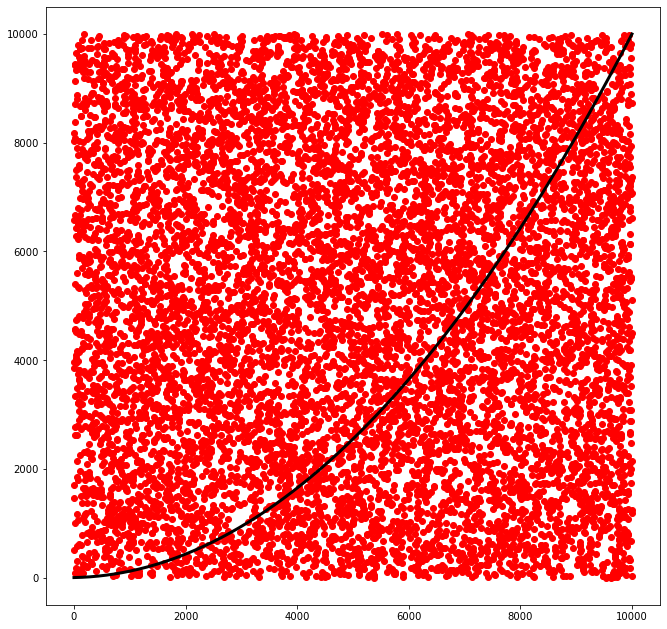

In [353]:
plt.figure()
fig= plt.figure(figsize=(11,11))
plt.scatter(a,np.arange(10000),c='red')
plt.plot(np.arange(10000),c, c='black',linewidth=3)
plt.show()

<Figure size 432x288 with 0 Axes>

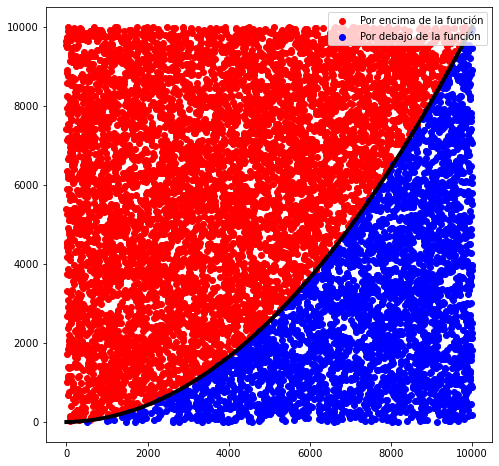

In [446]:
x = a < c
base = np.arange(10000)
plt.figure()
fig= plt.figure(figsize=(8,8))
plt.scatter(base[~x], a[~x], c = 'red', label = 'Por encima de la función')
plt.scatter(base[x], a[x], c = 'blue', label = 'Por debajo de la función')
plt.plot(np.arange(10000),c, c='black',linewidth=4)
plt.legend(loc=1)
plt.savefig('plot.png')

In [430]:
def cuadrado(x):
    return x * x

def integra_mc_vec(fun, a, b, num_puntos):
    """
    fun         - funcion sobre la que obtener la integral
    a           - limite izquierdo de la integral
    b           - limite derecho de la integral
    num_puntos  - numero de puntos a generar 
    """
    t_start = time.process_time()
    #generamos las series
    ran_points = np.random.randint(1,num_puntos,num_puntos)
    p_funcion = np.linspace(1,100,num_puntos)
    p_funcion = fun(c)
    
    #variables para la integral
    cuales = ran_points < p_funcion
    n_debajo = sum(cuales[a:b])
    m = max(p_funcion[a:b])
    
    t_end = time.process_time()
    
    print("Tiempo de ejecución %d ms" % (1000* (t_end-t_start)))
    
    return (n_debajo / num_puntos)*(b-a)*m 


def integra_mc_it1(fun, a, b, num_puntos):
    """
    fun         - funcion sobre la que obtener la integral
    a           - limite izquierdo de la integral
    b           - limite derecho de la integral
    num_puntos  - numero de puntos a generar 
    """
    t_start = time.process_time()
    #generamos las series
    ran_points = np.random.randint(1,num_puntos,num_puntos)
    p_funcion = np.linspace(1,100,num_puntos)
    p_funcion = fun(c)
    
    #variables para la integral
    cuales = []
    for index, valor_func in enumerate(p_funcion):
        cuales.append(True if (valor_func > ran_points[index]) else False)
    
    n_debajo = 0
    
    for j in range(a,b):
        n_debajo += 1 if cuales[j] else 0
    
    m = max(p_funcion[a:b])
    
    t_end = time.process_time()
    
    print("Tiempo de ejecución %d ms" % (1000* (t_end-t_start)))
    
    return (n_debajo / num_puntos)*(b-a)*m 


def integra_mc_it2(fun, a, b, num_puntos):
    """
    fun         - funcion sobre la que obtener la integral
    a           - limite izquierdo de la integral
    b           - limite derecho de la integral
    num_puntos  - numero de puntos a generar 
    """
    t_start = time.process_time()
    #generamos las series
    ran_points = np.random.randint(1,num_puntos,num_puntos)
    p_funcion = np.linspace(1,100,num_puntos)
    p_funcion = fun(c)
    
    #variables para la integral
    n_debajo = 0
    for index in range(a,b):
        if (p_funcion[index] > ran_points[index]):
            n_debajo += 1
        
    m = max(p_funcion[a:b])
     
    t_end = time.process_time()
    
    print("Tiempo de ejecución %d ms" % (1000* (t_end-t_start)))
    
    return (n_debajo / num_puntos)*(b-a)*m 
    
    
    

In [431]:
integra_mc_vec(cuadrado,2000,6000,10000)

Tiempo de ejecución 46 ms


21288929686.13488

In [432]:
integra_mc_it1(cuadrado,2000,6000,10000)

Tiempo de ejecución 15 ms


21288929686.13488

In [433]:
integra_mc_it2(cuadrado,2000,6000,10000)

Tiempo de ejecución 0 ms


21288929686.13488